In [1]:
import pymongo
import os
import json
from bson.json_util import dumps
import pandas as pd
from datetime import datetime
from datetime import timedelta
from datetime import date
from matplotlib import pyplot as plt

In [2]:
client = pymongo.MongoClient('put your mongodb connection string in here')

In [3]:
_id = '' #put your cluster or project ID here

In [4]:
db = client[_id]

In [5]:
def get_long_term_base(metric='average_temp', freq='20T'):
    cursor = db.base.find({})
    docs = []
    for document in cursor:
        docs.append(document)
    df = pd.DataFrame(docs)    
    df['timeIndex'] = pd.DatetimeIndex(df['_id'], )
    df = df.set_index('timeIndex') 
    met = df[metric].resample(freq).mean()
    return met
    

In [6]:
def get_target_date(target, metric='Room Temp', freq='20T'):
    #print(target,metric,freq)
    cursor = db.readings.find({})
    
    docs = []
    for document in cursor:
        if (document['Device'] == 'Enviro'):
            try:
                dayTarget = str(document['Date'])[:10]
                if (dayTarget == str(target)):
                    docs.append(document)
            except:
                continue
                
    fd = pd.DataFrame(docs)  
    fd = fd.set_index('Time')            
    met = fd[metric].resample(freq).mean()            
                
    return met           

In [7]:
def make_plot(metric, freq='20T', back=1):
    today = date.today()
    target = today - timedelta(days=back)
    
    mapAtt = {'Room Temp': 'average_temp',
       'Room Humidity' : 'average_humidity',
       'Oxidising Gas' : 'average_Ox',
       'Reducing Gas' : 'average_Red',
       'nh3 Gas' : 'average_nh3',
       'Light' : 'average_light',
       'Room Pressure' : 'average_press'}

    mapMeasure = {'Room Temp': 'Degrees Celsius',
       'Room Humidity' : '%',
       'Oxidising Gas' : 'ppm',
       'Reducing Gas' : 'ppm',
       'nh3 Gas' : 'ppm',
       'Light' : 'Lux Level',
       'Room Pressure' : 'mBars'}  
    
   
    longMet = mapAtt[metric]
    measure = mapMeasure[metric]

    met = get_long_term_base(longMet)
    met2 = get_target_date(target, metric=metric)

    ff = pd.concat([met,met2], axis=1)
    legs = ['average',target.strftime("%d/%m/%Y")]
    ff.plot()
    plt.title(f"Comparative Analysis of {metric}")
    plt.xlabel(f"Minutes in {freq} slots")
    plt.ylabel(f"{measure}")
    plt.legend(legs)
        


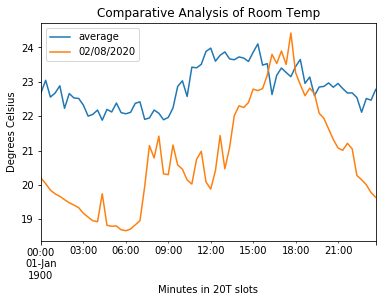

In [19]:
plots = ['Room Temp', 'Room Humidity', 'Oxidising Gas', 'Reducing Gas', 'nh3 Gas', 'Light', 'Room Pressure']

make_plot('Room Temp', back=1)